# Hunger in Africa: the Global Hunger Index over the years

This analysis aims to show the evolution of the Global Hunger Index (GHI) in African countries over the years.
The dataset contains values for GHI in 4 different years.

### Many people still have limited access to food

<img style="float: left; width: 400px; padding: 10px" src="https://images.unsplash.com/photo-1507427100689-2bf8574e32d4?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=987&q=80">

Hunger is characterized as a state in which a person lacks the physical or financial capacity to eat enough food to meet basic nutritional demands, for an extended length of time.

Parts of the world's population have frequently experienced prolonged periods of starvation throughout history. Hunger was frequently a result of disturbances in the food supply brought on by conflict, epidemics, or bad weather. Technological advancement and improved political collaboration in the decades after World War II raised the possibility that the number of people who experience hunger could be significantly reduced. Even while progress was uneven, by 2014 a sizable section of the world's population no longer faced the threat of extreme hunger. According to the FAO's 2021 The State of Food Security and Nutrition in the World (SOFI) report, between 2014 and 2019, a gradual increase in the number of individuals experiencing chronic hunger started. There was a substantial uptick in 2020, with 768 million people suffering as a result.

While the majority of the world's population still resides in Asia, Africa and South America have seen the largest increases in hunger since 2015. Climate change, armed conflict, and economic slowdowns were the three main causes of the recent increase in hunger, according to the FAO's 2017 report.  
*Photo by <a href="https://unsplash.com/@hcmorr?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Hanna Morris</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>*

# Introduction

According to "What is the Global Hunger Index" by ?( https://www.concern.net/what-global-hunger-index ),

**What is the Global Hunger Index?**

The Global Hunger Index is a tool that measures and tracks hunger nationally, regionally and globally. The report is prepared by Concern Worldwide and the European NGO and our Alliance2015 partner Welthungerhilfe.

Scores are calculated and assigned to countries around the world to assess progress and setbacks in combating hunger worldwide, and to give a picture of hunger across different regions and the world. 

According to the GHI website, the index is “designed to raise awareness and understanding of the struggle against hunger, provide a way to compare levels of hunger between countries and regions, and to call attention to those areas of the world where hunger levels are highest and where the need for additional efforts to eliminate hunger is greatest”.

**How is the GHI calculated?**

The score of a country is calculated based on four indicators - undernourishment, child stunting, child wasting, and child mortality.

1. Undernourishment:This refers to the share of the population that is undernourished, or whose caloric intake is insufficient.

2. Child stunting : This refers to the share of children under the age of five who have low height for their age, reflecting chronic undernutrition.

3. Child wasting : This refers to the share of children under the age of five who have low weight for their height, reflecting acute undernutrition.

4. Child mortality : This refers to the mortality rate of children under the age of five.

Each indicator is given a standardised score on a 100-point scale based on the highest observed level for the indicator on a global scale in recent decades. The scores are then aggregated to calculate the GHI score for each country.

These scores place a country along a severity scale:

Low = less than or equal to 9.9 

Moderate = 10.0 - 19.9

Serious = 20.0 - 34.9

Alarming = 35.0 - 49.9

Extremely alarming = less than or equal to 50.0 

So, high scores across the indicators will give a country a score that places them at serious, alarming or extremely alarming levels of hunger, while a lower aggregated score classifies a country as low or moderate. 

The data used to compile these scores comes from a number of sources, including UNICEF, the World Health Organisation (WHO), the World Bank, the Food and Agriculture Organisation of the United Nations (FAO), the United Nations Interagency Group for Child Mortality Estimation (UN IGME), and the Global Database on Child Growth and Malnutrition. 

Not all countries are given a GHI score. Some high-income countries where the prevalence of hunger is low, and where child mortality does not reflect malnutrition to the same extent as it does in lower-income countries, are not scored on the index; countries with small populations, such as Belize, are also left off. Other countries are given provisional scores due to a lack of up-to-date data across the four indicators.

reference "What is the Global Hunger Index" by ?(https://www.concern.net/what-global-hunger-index)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 
df = pd.read_csv('global-hunger-index.csv')

continents = pd.read_csv('countryContinent.csv', encoding='latin-1')
continents = continents[['country', 'continent']]

df = df.join(continents.set_index('country'), on='Entity')

# rename GHI	to GHI
df.rename(columns={'Global Hunger Index (2021)': 'GHI'}, inplace=True)


# Exploratory Data Analysis

### Difference between continents

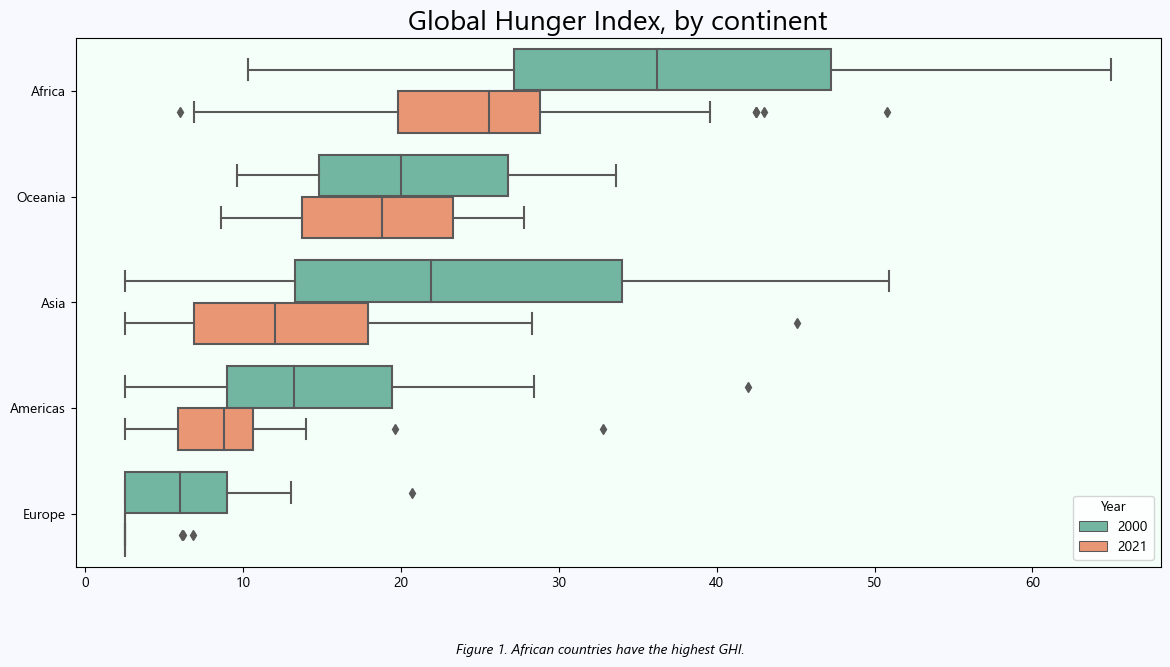

In [21]:
df_2021 = df[df['Year'].isin([2000,2021])]
plt.rcParams['font.family'] = 'Segoe UI'

fig, ax = plt.subplots(figsize=(14, 7), dpi=100)
import seaborn as sns
sns.boxplot(data = df_2021, x='GHI', y='continent', order = ['Africa','Oceania','Asia', 'Americas', 'Europe'], palette='Set2', hue = 'Year', ax=ax)
fig.text(.50, .0, 'Figure 1. African countries have the highest GHI.', ha='center', style='italic')
plt.ylabel('')
plt.xlabel('')
plt.title('Global Hunger Index, by continent', font = 'Segoe UI', fontsize = 20)
fig.patch.set_facecolor('ghostwhite')
ax.patch.set_facecolor('mintcream')

plt.show()


The above plot shows that the continent with the highest Global Hunger Index is Africa.
Fortunately, it appears that there has been a substantial improvement in every continent in the last twenty years.  
However, the World Hunger problem still affects many contries, and it's far from over.
### A closer look to African countries


In [18]:

df = df.loc[df['continent'] == 'Africa']
#all countries list
countries = df['Entity'].unique()

#group by year and country with count   
df = df.loc[df['continent'] == 'Africa']
countries_count = df.groupby(['Entity']).count().reset_index()
print('Countries excluded  because of missing values: ', countries_count[countries_count['Year'] < 4]['Entity'].unique())

df = df[df['Entity'].isin(countries_count[countries_count['Year'] == 4]['Entity'].unique())]

df = df[df['Entity'].isin(countries)]


n_countries = len(df['Entity'].unique())
print(f'There are a total of {n_countries} countries in the analysis')



Countries excluded  because of missing values:  []

There are a total of 34 countries in the analysis


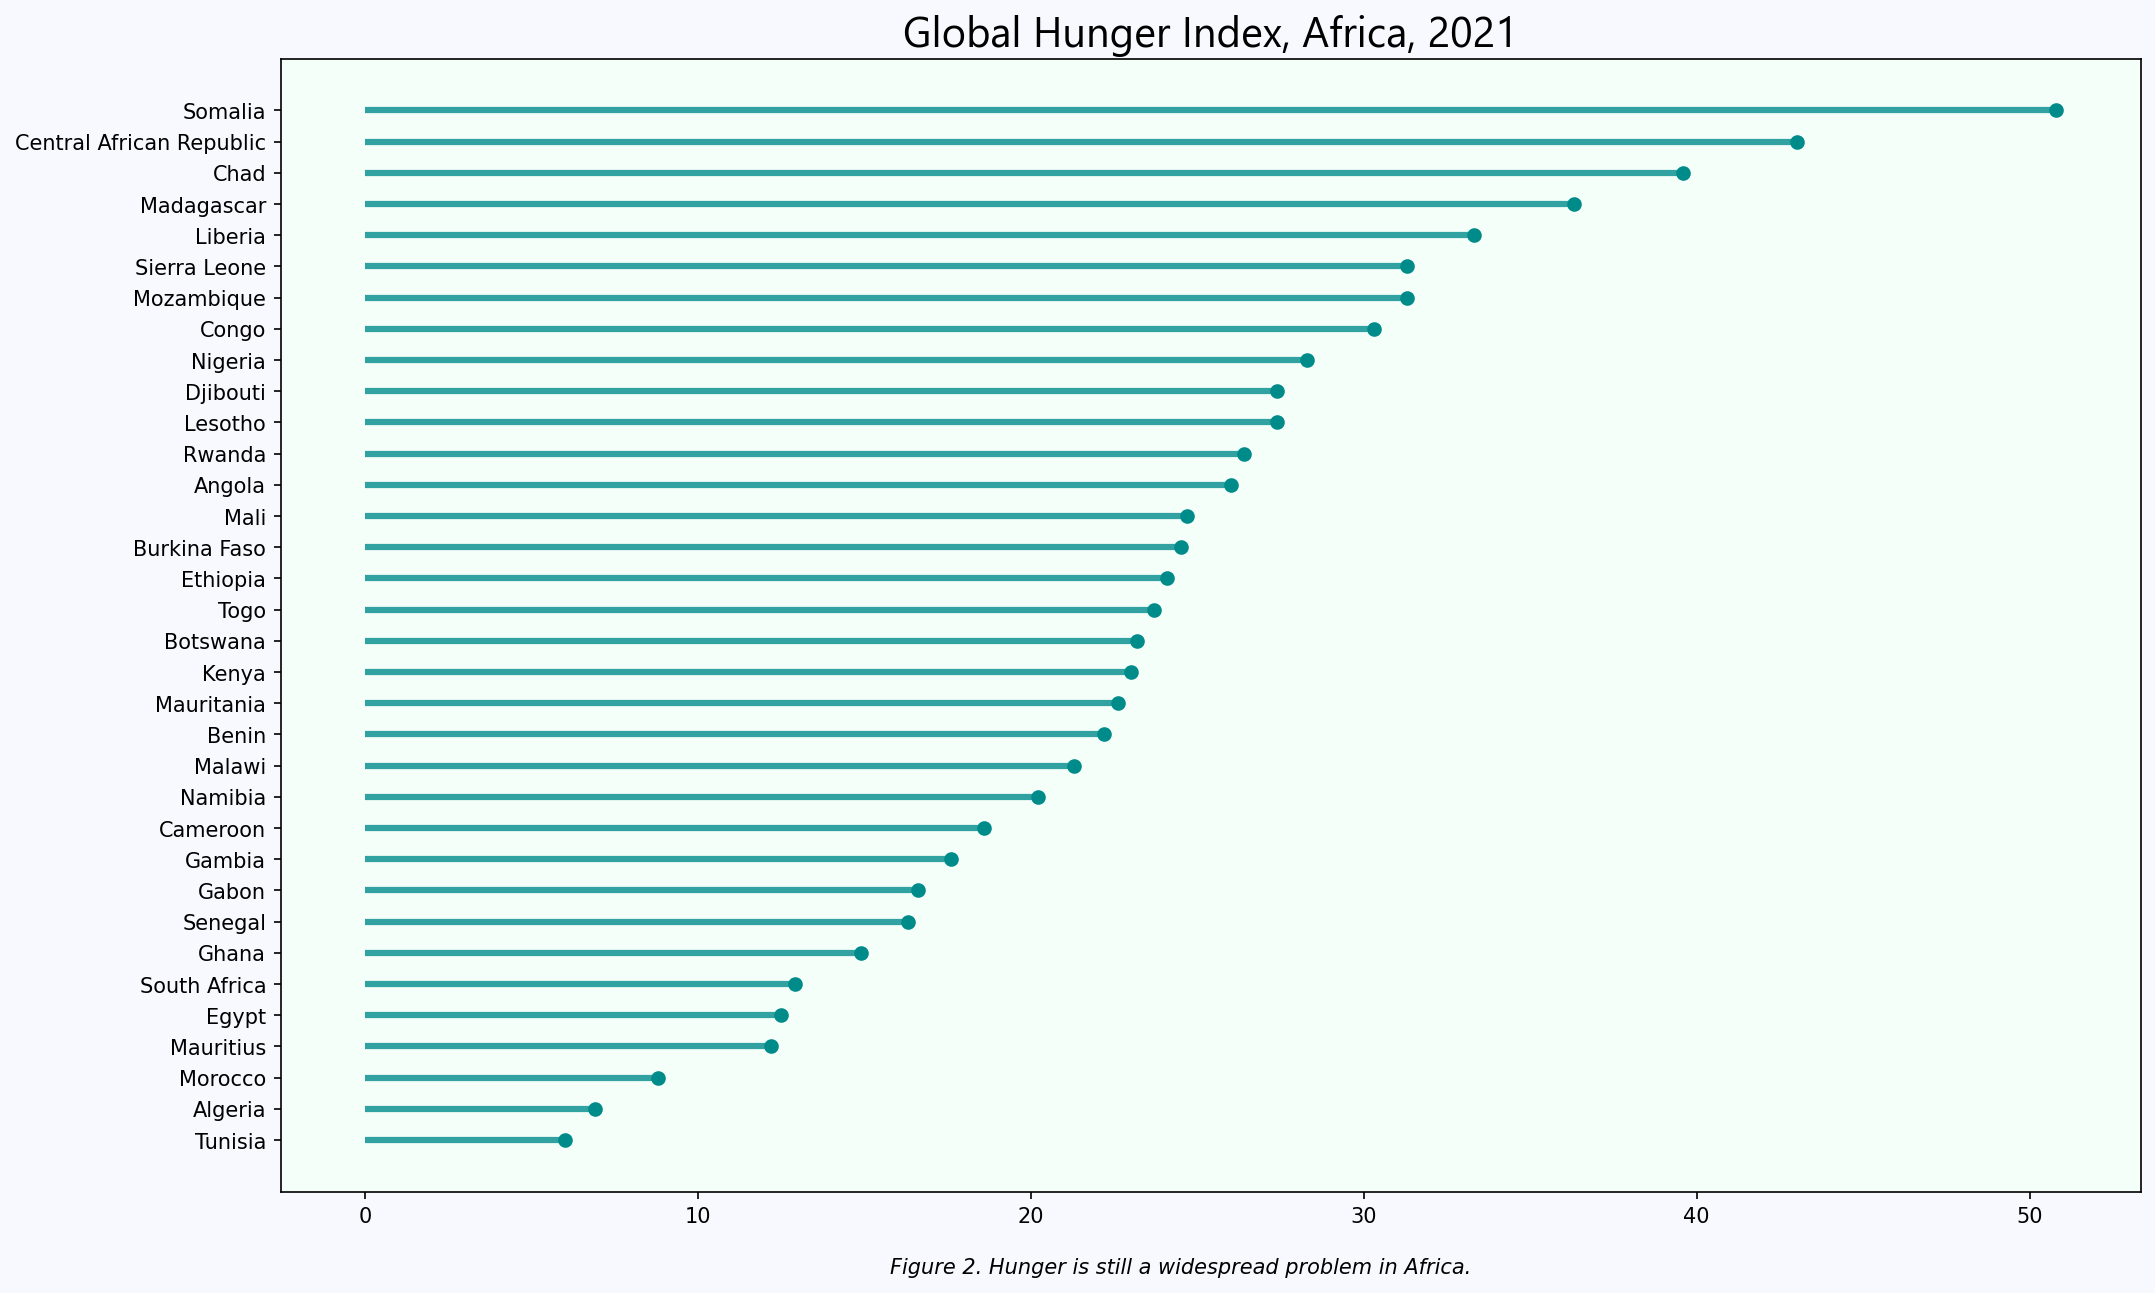

In [12]:
df_2021 = df[df['Year'] == 2021]

#sort df_2021
df_2021 = df_2021.sort_values(by='GHI', ascending=True).reset_index(drop = True)

plt.rcParams['font.family'] = 'Sans'

plt.rcParams['font.family'] = 'Sans'
fig, ax = plt.subplots(figsize=(16, 10), dpi = 150)
#df_2021.plot.barh(x='Entity', y='GHI', ax=ax)
my_range=range(0,len(df['Entity'].unique()))
# plt.stem(df_2021['GHI'])
plt.hlines(y=df_2021['Entity'], xmin=0, xmax=df_2021['GHI'], color = 'darkcyan', linewidth=3, alpha =0.8)
plt.scatter(df_2021['GHI'], my_range, color='darkcyan',  alpha=1)
plt.title('Global Hunger Index, Africa, 2021', font = 'Segoe UI', fontsize = 20)
fig.text(.50, .07, 'Figure 2. Hunger is still a widespread problem in Africa.', ha='center', style='italic')

#plt.xticks( my_range, df_2021['Entity'], rotation = 90)
plt.ylabel('')
plt.xlabel('')
fig.patch.set_facecolor('ghostwhite')
ax.patch.set_facecolor('mintcream')
plt.show()


Figure 2 shows the current situation in African countries. Northern countries seems to have lower levels of GHI.

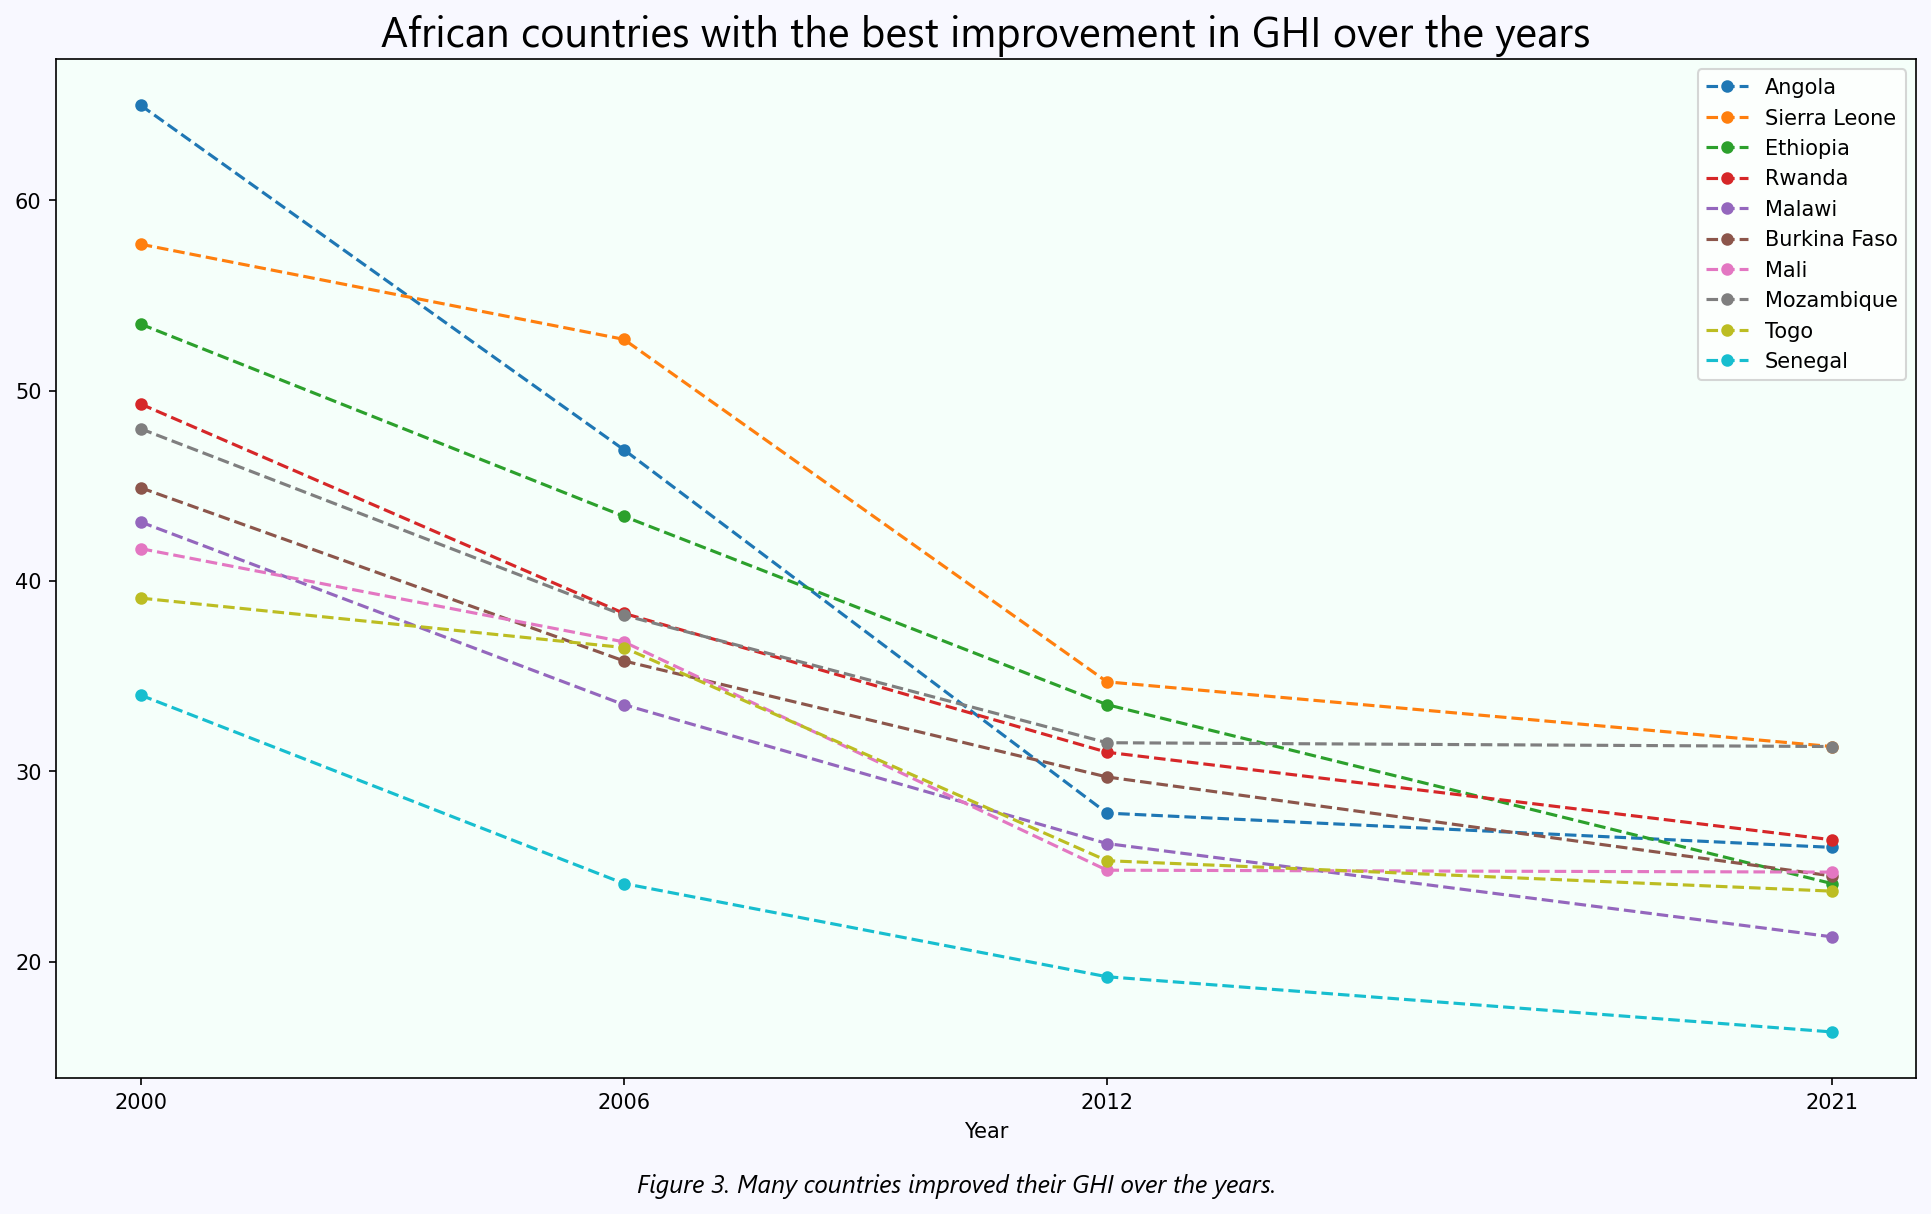

In [19]:
#filter year 2000
df_2000 = df[df['Year'] == 2000]
#filter year 2021
df_2021 = df[df['Year'] == 2021]

#sort by hunger index
df_2000 = df_2000.sort_values(by='GHI', ascending=False).reset_index(drop = True)
df_2000

#group by year and  apply standard deviation
df_var = df.groupby('Entity').std().sort_values(by='GHI', ascending=False).reset_index()


top_10_var = df_var.head(10)
plt.rcParams['font.family'] = 'Sans'

#plot the data

fig, ax = plt.subplots(figsize=(16, 9), dpi=150)
#filter the top 10 countries

for country in top_10_var['Entity']:
    df[df['Entity'] == country].plot(x='Year', y='GHI', ax=ax, label=country,  linestyle = '--', marker = '.', markersize = 10)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend( loc='upper right', fontsize = 10)
plt.xticks([2000, 2006, 2012, 2021])
plt.title('African countries with the best improvement in GHI over the years', font = 'Segoe UI', fontsize = 20)

fig.text(.50, .04, 'Figure 3. Many countries improved their GHI over the years.', font = 'Segoe UI', fontsize = 12, ha = 'center', style = 'italic')
fig.patch.set_facecolor('ghostwhite')
ax.patch.set_facecolor('mintcream')
plt.show()



Figure 3 shows the 10 countries with the best improvement in GHI.  
Angola shows the higher reduction, followed by Sierra Leone and Ethiopia. 

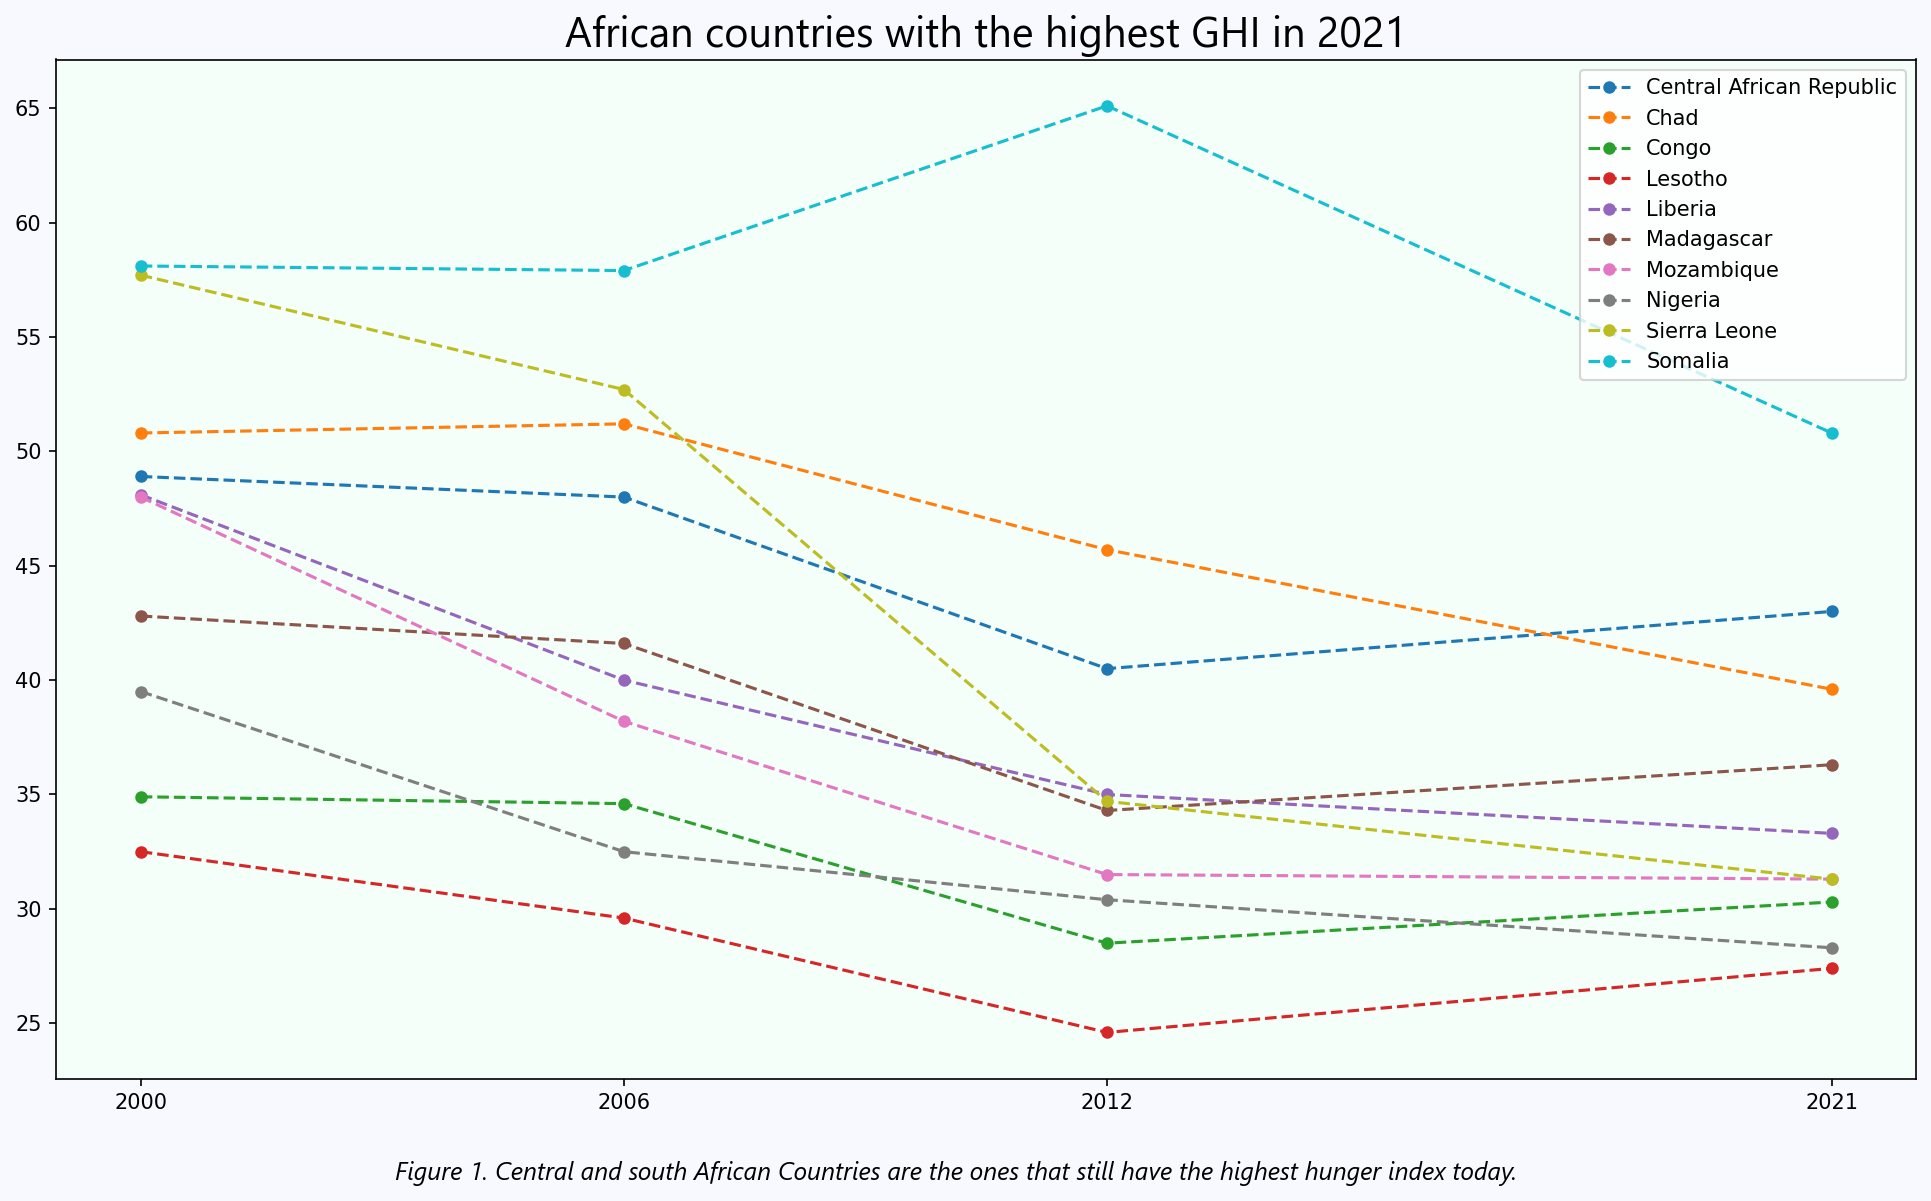

In [14]:
df_diff = df.groupby('Entity')['GHI'].apply(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()
df_reduction = df_diff.sort_values(by='GHI', ascending=False)
df_reduction['Reduction'] = df_reduction['GHI'].apply(lambda x: -x)

top_10_hunger = df_2021.sort_values(by='GHI', ascending=False).reset_index(drop = True)['Entity'].head(10).to_list()
df_top10 = df_2021[df_2021['Entity'].isin(top_10_hunger)]

plt.rcParams['font.family'] = 'Sans'

fig, ax = plt.subplots(figsize=(16, 9), dpi=150)

for country in df_top10['Entity']:
    df[df['Entity'] == country].plot(x='Year', y='GHI', ax=ax, label=country,  linestyle = '--', marker = '.', markersize = 10)
plt.legend(loc='upper right', fontsize = 10)
plt.xticks([2000, 2006, 2012, 2021])
plt.xlabel('')
fig.text(.50, .05, 'Figure 4. Central and south African Countries are the ones that still have the highest hunger index today.', font = 'Segoe UI', fontsize = 12, ha = 'center', style = 'italic')

plt.title('African countries with the highest GHI in 2021', font = 'Segoe UI', fontsize = 20)
fig.patch.set_facecolor('ghostwhite')
ax.patch.set_facecolor('mintcream')
plt.show()



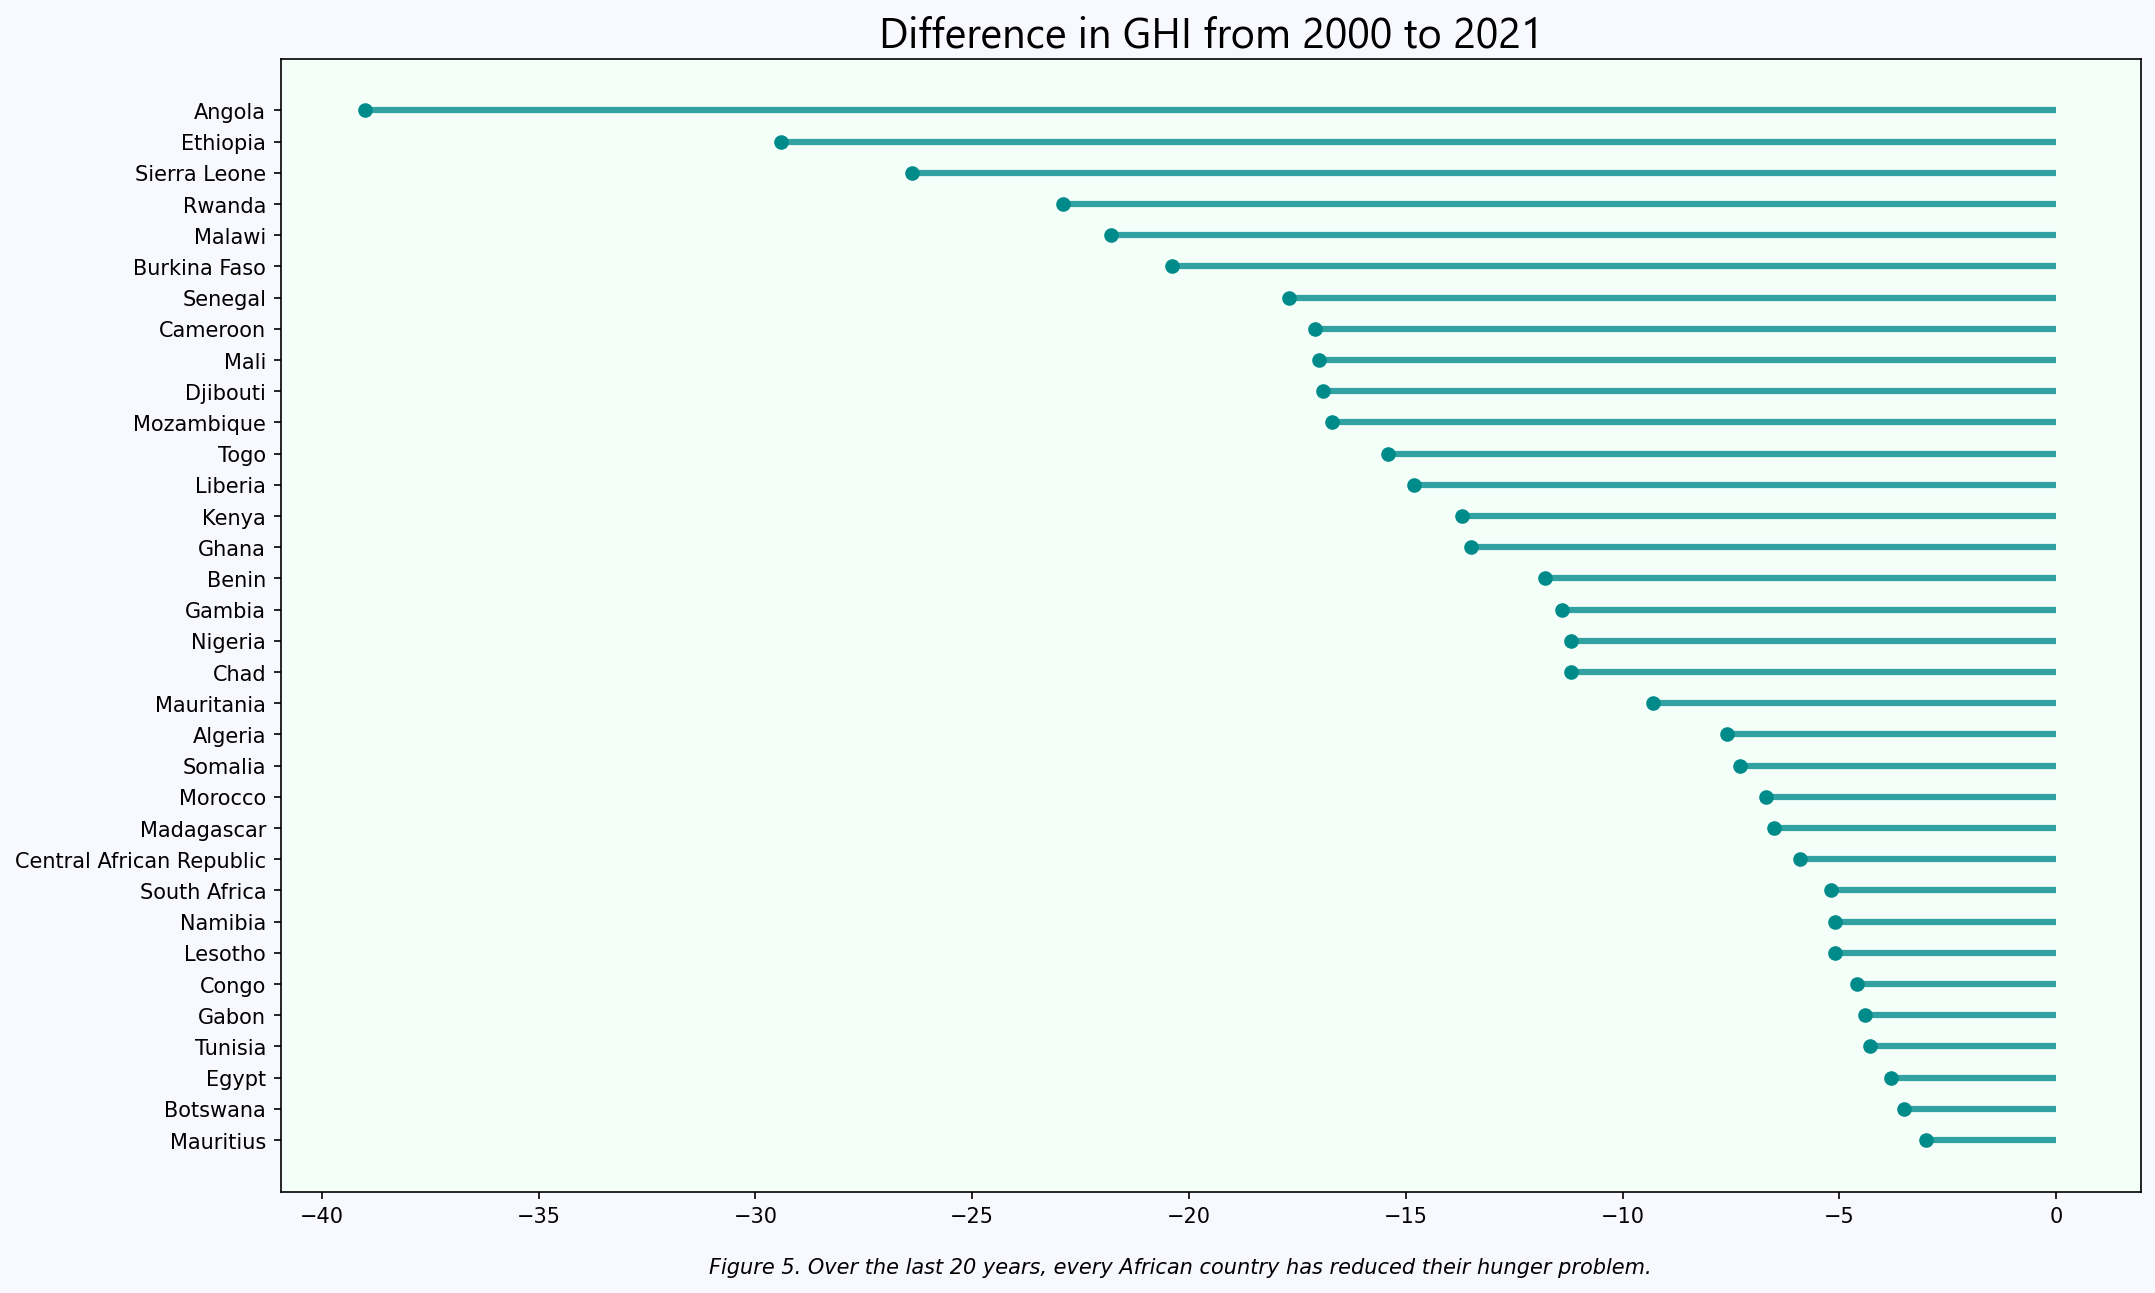

In [15]:
df_diff = df.groupby('Entity')['GHI'].apply(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()
df_reduction = df_diff.sort_values(by='GHI', ascending=False)
df_reduction['Reduction'] = df_reduction['GHI'].apply(lambda x: -x)
plt.rcParams['font.family'] = 'Sans'
plt.rcParams['font.family'] = 'Sans'
fig, ax = plt.subplots(figsize=(16, 10), dpi = 150)
my_range=range(0,len(df['Entity'].unique()))
plt.hlines(y=df_reduction['Entity'], xmin=0, xmax=df_reduction['GHI'], color = 'darkcyan', linewidth=3, alpha =0.8)
plt.scatter(df_reduction['GHI'], my_range, color='darkcyan',  alpha=1)
plt.title('Difference in GHI from 2000 to 2021', font = 'Segoe UI', fontsize = 20)
fig.text(.50, .07, 'Figure 5. Over the last 20 years, every African country has reduced their hunger problem.', ha='center', style='italic')
plt.ylabel('')
plt.xlabel('')
fig.patch.set_facecolor('ghostwhite')
ax.patch.set_facecolor('mintcream')
plt.show()



In [16]:
uw = pd.read_csv('share-of-children-underweight.csv')
#rename Prevalence of underweight, weight for age (% of children under 5) to Underweight
uw.rename(columns={'Prevalence of underweight, weight for age (% of children under 5)': 'Underweight'}, inplace=True)


#mean prevalence of underweight in different decades
result = []
uw_0 = uw[(uw['Year'] < 1995)].groupby('Underweight').mean().reset_index()
result.append(('Before 1995', uw_0['Underweight'].mean().round(3)))
uw_1 = uw[(uw['Year'] > 1995) &  (uw['Year'] <= 2000)].groupby('Underweight').mean().reset_index()
result.append(('1996-2000', uw_1['Underweight'].mean().round(3)))
uw_2 = uw[(uw['Year'] > 2000) &  (uw['Year'] <= 2005)].groupby('Underweight').mean().reset_index()
result.append(('2001-2005', uw_2['Underweight'].mean().round(3)))
uw_2 = uw[(uw['Year'] > 2005) &  (uw['Year'] <= 2010)].groupby('Underweight').mean().reset_index()
result.append(('2006-2010', uw_2['Underweight'].mean().round(3)))
uw_2 = uw[(uw['Year'] > 2010) &  (uw['Year'] <= 2015)].groupby('Underweight').mean().reset_index()
result.append(('2011-2015', uw_2['Underweight'].mean().round(3)))
uw_3 = uw[(uw['Year'] > 2015)].groupby('Underweight').mean().reset_index()
result.append(('2016-2021', uw_3['Underweight'].mean().round(2)))

res_df = pd.DataFrame(result, columns=['Decade', 'Underweight'])

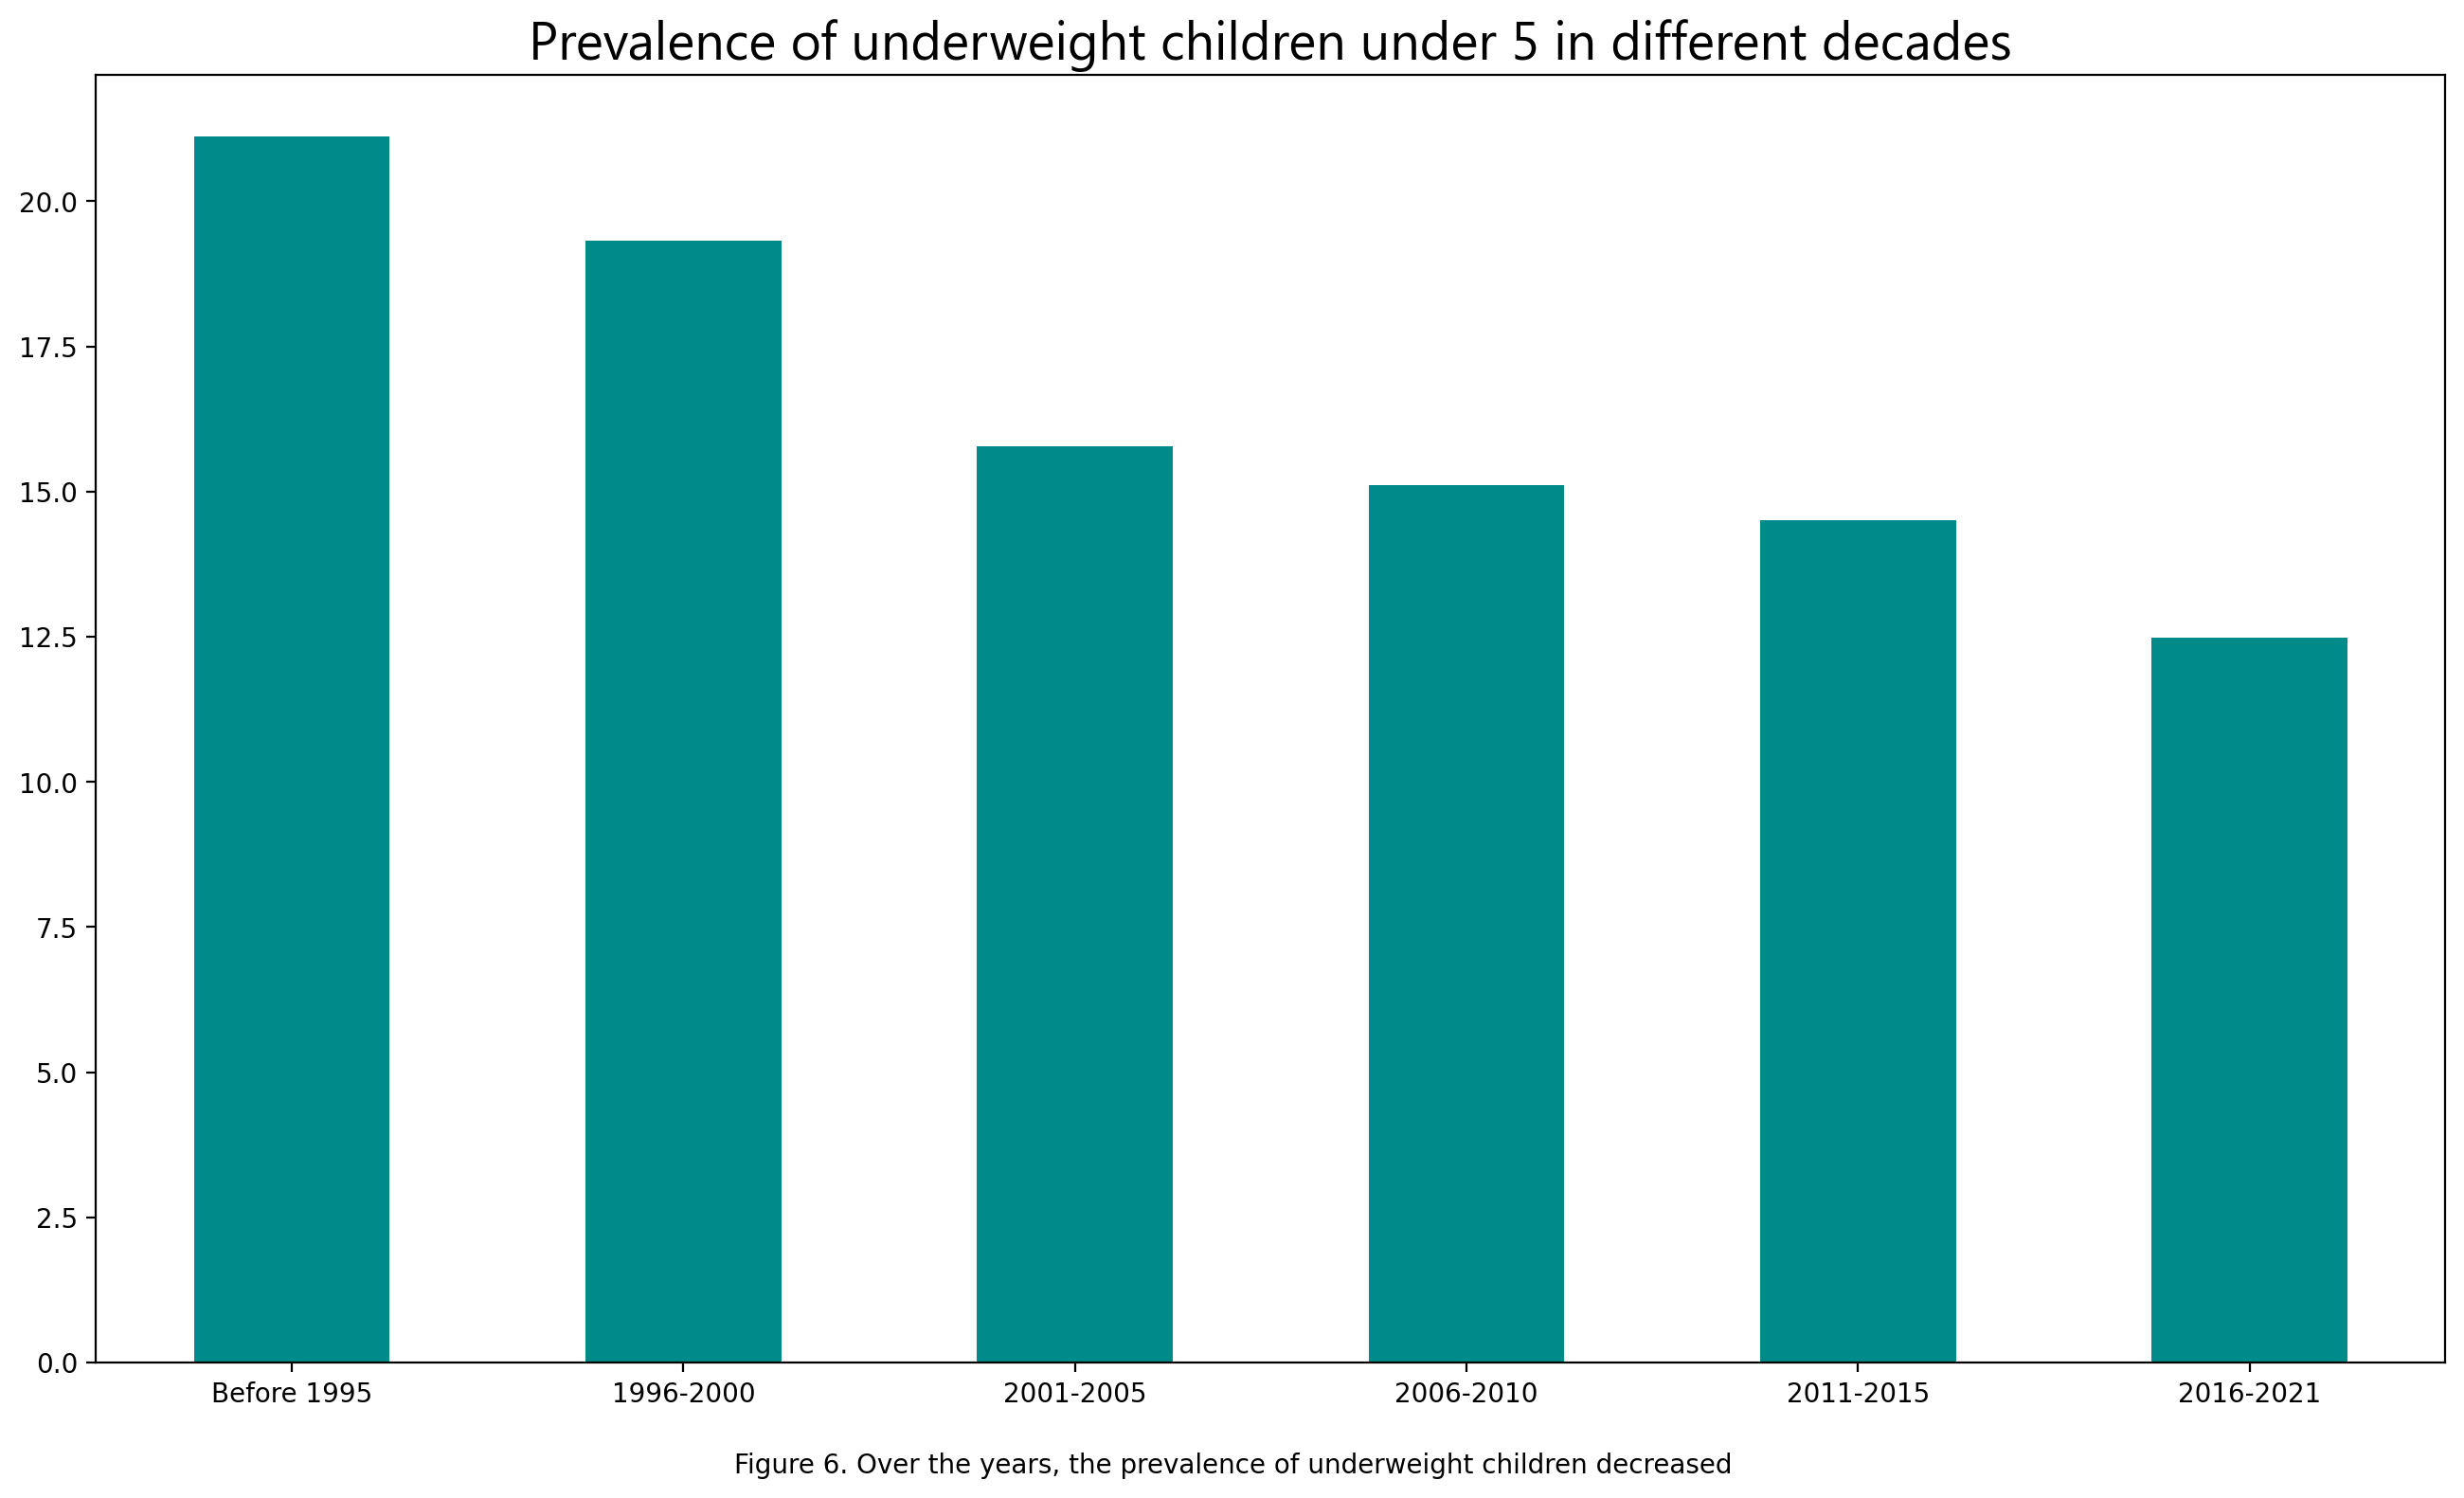

In [17]:
plt.rcParams['font.family'] = 'Sans'
fig, ax = plt.subplots(figsize=(16, 9), dpi=200)
res_df.plot.bar(x='Decade', y='Underweight', ax=ax, color = 'darkcyan')
plt.xticks(rotation=0)
plt.title('Prevalence of underweight children under 5 in different decades', font = 'Segoe UI', fontsize = 20)
ax.get_legend().remove() 
fig.text(.50, .06, 'Figure 6. Over the years, the prevalence of underweight children decreased', ha='center')
plt.xlabel('')
plt.show()

Figure 6 shows the percentage of underweight children under 5. The situation thirthy years ago was dramatic: more than one child out of five was underweight.
While in recent years the ratio dropped to 1/8, there is still a lot of room for improvement.

# Conclusion
Global Hunger Index of 'Angola','Sierra Leone','Ethiopia','Afganistan','Chad'and "Democratic Republic of Congo" have been decreasing since 2000. On the other hand, GHI of 'Somalia' increased between 2000 and 2012, and then began to decrease. Actually, there was very serious famine in 2011 in Somalia as the result of a major drought, rapid food price inflation and conflict. 

Although data is not enough, 'Prevalence of underweight, weight for age (% of children under 5)' and 'Prevalence of wasting, weight for height (% of children under 5)' of Somalia are relatively high and 'Prevalence of stunting, height for age (% of children under 5)' of Somalia is relatively low.

In the blog **'2021 Global Hunger Index: Three Cs are starving the world' by BY CESVI** (https://www.cesvi.eu/news/2021-global-hunger-index-three-cs-are-starving-the-world/), we can find some tips.

"Armed conflicts, the pandemic and climate change threaten to pulverise the slow progress made in the past years towards the “Zero Hunger” Goal set for the year 2030 by the United Nations. After years of decline, in 2020 the percentage of malnourished people in the world is on the rise: 155 million people are in a state of acute food insecurity, 20 million more than in 2019. The fight against global hunger faces a heavy setback. According to the 2021 Global Hunger Index, in 47 countries hunger remains exceptionally high and with little chance to reduce it to lower levels by the end of the decade.

**Conflicts represent the main cause of hunger**

Ever more plentiful and prolonged, armed conflicts remain the main cause of hunger in the world. In 2020 alone, there were 169 active conflicts. It is not a coincidence if 8 out of 10 countries with alarming or extremely alarming levels of hunger coincide with theatres of war: from the Democratic Republic of the Congo to Nigeria, from South Sudan to Syria, Yemen and Somalia. Hunger and war are tied up to one another. Violent conflicts have a devastating impact on food systems because they harm them in every aspect, from production to consumption. And prolonged food insecurity is one of the most severe legacies of war. At the same time, the rise of food insecurity can contribute to violent conflicts.

**The COVID-19 pandemic**

The effects of the pandemic on the rise of hunger are not yet fully observable. Nevertheless, today it already appears evident that food security has been endangered by the economic shock that went with the global health crisis. It is estimated that the number of people affected by acute food insecurity increased by almost 20 million in 2020, compared to the previous year. According to the FAO, as a consequence of the pandemic in 2030, there will be about 30 million more undernourished people – compared with previous projections – accounting for 657 million people worldwide."

# What is happening in Somalia ?

And we can also find whit is happening in Somalia in the article **"‘Nothing to eat’: Somalia hit by triple threat of climate crisis, Covid and conflict" of the Guardian** (https://www.theguardian.com/global-development/2021/aug/23/nothing-to-eat-somalia-hit-by-triple-threat-of-climate-crisis-covid-and-conflict)

"Prolonged droughts, shrinking water resources and lack of fertile land are fuelling tensions between clans and creating large-scale displacement across Somalia. A cluster of overlapping crises are menacing the fragile east African country, with the climate crisis exacerbating existing conflicts and contributing to new ones, Covid-19 claiming lives and livelihoods, and political instability never far away.

The result, warn humanitarian agencies, is hunger: the International Federation of Red Cross and Red Crescent Societies (IFRC) warned earlier this month that Somalia is “on the cusp of a humanitarian catastrophe”, with one in four people facing high levels of acute food insecurity and more than 800,000 children under the age of five at risk of acute malnutrition."

and 

"With a fragile economy largely based on agriculture, Somalia is vulnerable to increasingly erratic and extreme weather patterns, such as repeated droughts and seasonal floods. In the former, crops fail, and livestock die from lack of water and food; in the latter, they are simply washed away. Like much of the region, the country has also had to contend this year and last with swarms of desert locusts that consume approximately their own weight in fresh food every day."

reference:
* "What is the Global Hunger Index" by ?( https://www.concern.net/what-global-hunger-index )
* 2021 Global Hunger Index: Three Cs are starving the world' by BY CESVI (https://www.cesvi.eu/news/2021-global-hunger-index-three-cs-are-starving-the-world/)
* "‘Nothing to eat’: Somalia hit by triple threat of climate crisis, Covid and conflict" of the Guardian (https://www.theguardian.com/global-development/2021/aug/23/nothing-to-eat-somalia-hit-by-triple-threat-of-climate-crisis-covid-and-conflict)

Thank you !